In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [2]:
logdirs={516 : '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log3',
         616 : '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log7',
         716 : '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log8',
         532 : '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log11',
         #616 : '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log10',
        61612: '/gpfs/slac/staas/fs1/g/neutrino/ldomine/icarus_workshop_train/log10'}
dfs={}
for key,path in logdirs.items():
    files=['%s/%s' % (path,f) for f in os.listdir(path) if f.endswith('.csv')]
    files.sort()
    dfs[key]=pd.concat([pd.read_csv(f) for f in files])


Key 516


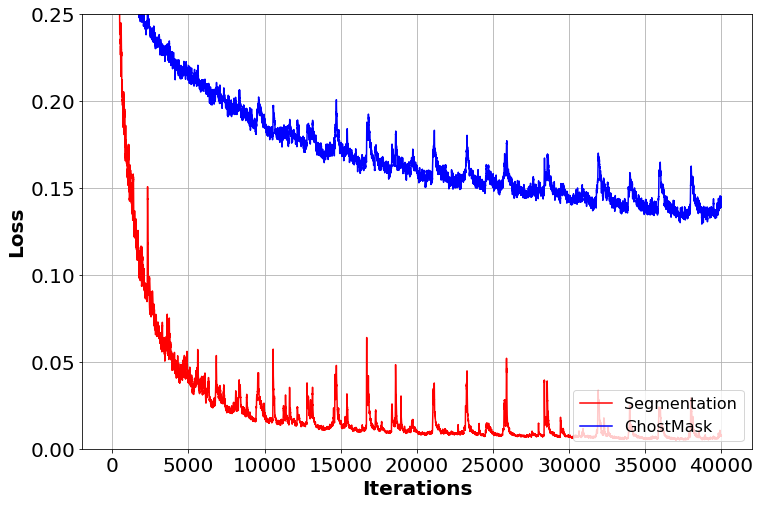

Key 616


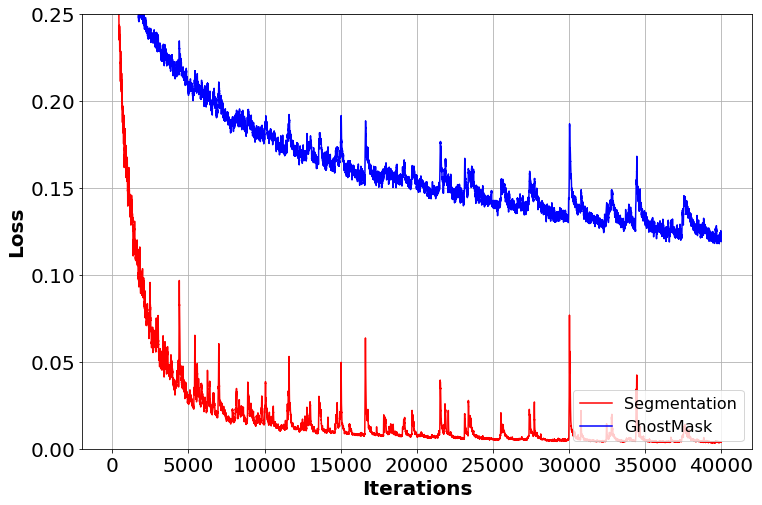

Key 716


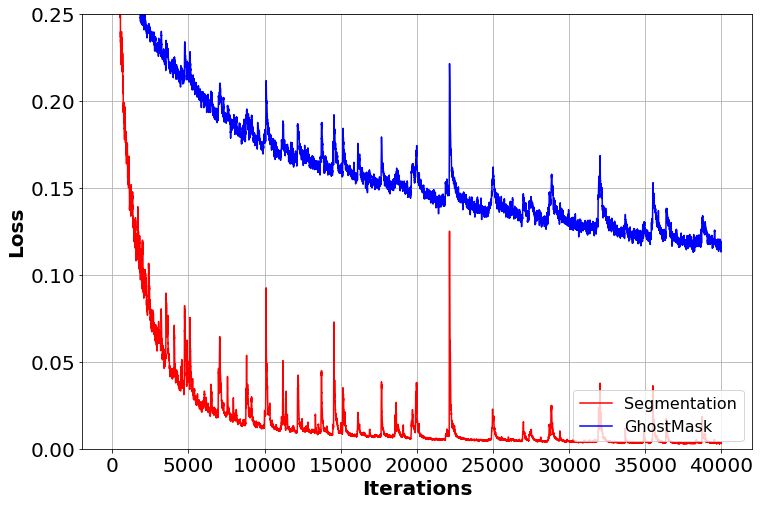

Key 532


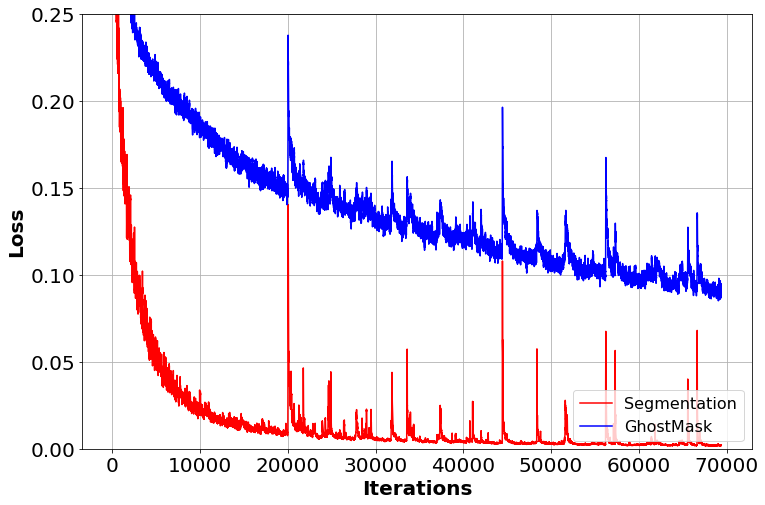

Key 61612


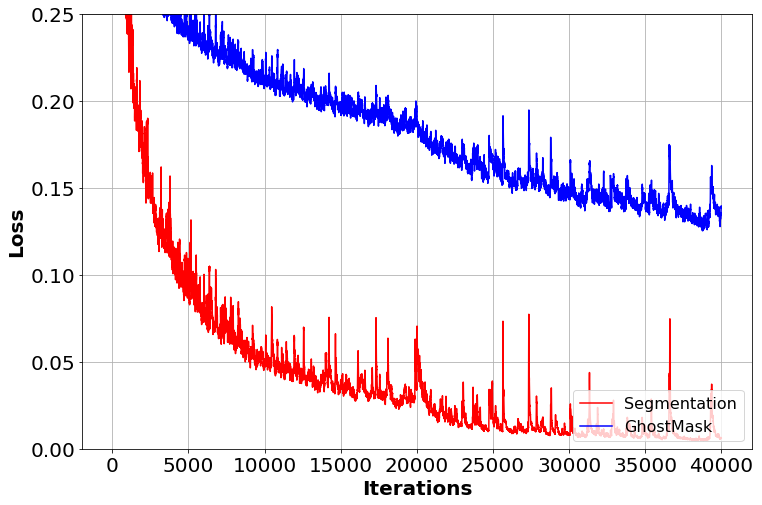

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

for key, df in dfs.items():
    print('Key',key)
    fig,ax = plt.subplots(figsize=(12,8),facecolor='w')
    ax.plot(moving_average(df.iter.values,20),moving_average(df.uresnet_loss.values,20),color='red',label='Segmentation')
    ax.plot(moving_average(df.iter.values,20),moving_average(df.mask_loss.values,20),color='blue',label='GhostMask')
    plt.tick_params(labelsize=20)
    plt.grid(True,which='both')
    plt.xlabel('Iterations',fontsize=20,fontweight='bold')
    plt.ylabel('Loss',fontsize=20,fontweight='bold')
    leg=plt.legend(fontsize=16,loc=4)
    leg_frame=leg.get_frame()
    leg_frame.set_facecolor('white')
    ax.set_ylim(0.,0.25)
    plt.show()

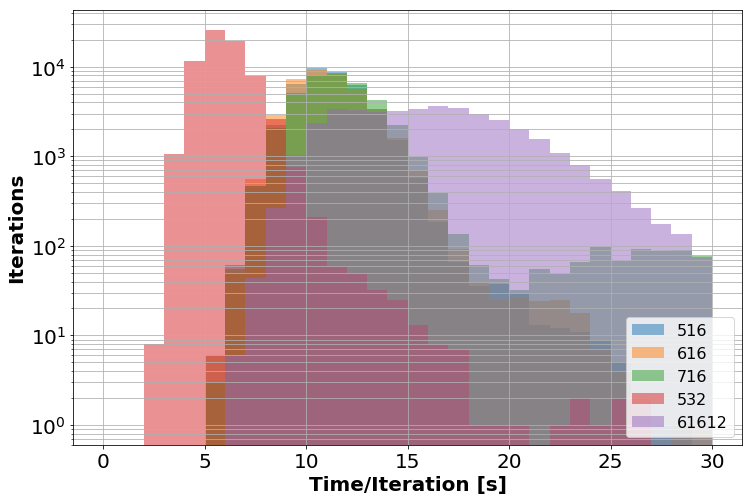

In [4]:
fig,ax=plt.subplots(figsize=(12,8),facecolor='w')

for key,df in dfs.items():
    ax.hist(df.titer,range=(0,30),bins=30,label=str(key),alpha=0.5)

plt.tick_params(labelsize=20)
plt.grid(True,which='both')
plt.xlabel('Time/Iteration [s]',fontsize=20,fontweight='bold')
plt.ylabel('Iterations',fontsize=20,fontweight='bold')
leg=plt.legend(fontsize=16,loc=4)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')
ax.set_yscale('log')
plt.show()